In [43]:
import sys
sys.path.append("/home/phylab/hepwork/ma5-histo")
sys.path.append("/home/phylab/hepwork/ma5_expert")

import src.SafReader as sr
from CutFlowReader import Collection 

import pandas as pd
import numpy as np
import matplotlib, os
import matplotlib.pyplot as plt

plt.rcParams['xtick.direction']     = 'in'
plt.rcParams['ytick.direction']     = 'in'
plt.rcParams['xtick.top']           = True
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.right']         = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import matplotlib.cm as cm

from matplotlib import pyplot


In [44]:
def df(fileLoc):
    data = sr.read(fileLoc=fileLoc)
    floatCols=['binMin', 'binMax', 'value']
    data[floatCols]  = data[floatCols].apply(pd.to_numeric, errors='coerce')
    data["bin"]      = (data.binMin+data.binMax)/2
    data             = data[data.binMax != np.inf]
    data             = data[data.binMin != -1*np.inf]
    data["binlabel"] = (data.binMin+data.binMax)/2
    return data

In [41]:
ma5 = '/home/phylab/hepwork/madanalysis5'

sm  = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/SMll_SameSeed/MadAnalysis5job_2/Cutflows',
                    saf_file       = '/home/phylab/hepwork/3.0.3-neworders/HEPTools/madanalysis5/madanalysis5/Benj_SM_leplep_SameSeed/Output/SAF/_defaultset/_defaultset.saf',
                    lumi           = 35.9)
sm_sumw   = sm['Rap_0'][0].sumw
sm_histos = df(ma5+'/SSM_Zptoll/Output/SAF/SMll_SameSeed/MadAnalysis5job_2/Histograms/histos.saf')


StockSM = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/StockSMll_SameSeed/MadAnalysis5job_2/Cutflows',
                    saf_file       = '/home/phylab/hepwork/3.0.3-neworders/HEPTools/madanalysis5/madanalysis5/StockSM_leplep_SameSeed/Output/SAF/_defaultset/_defaultset.saf',
                    lumi           = 35.9)
StockSM_sumw   = StockSM['Rap_0'][0].sumw
StockSM_histos = df(ma5+'/SSM_Zptoll/Output/SAF/StockSMll_SameSeed/MadAnalysis5job_2/Histograms/histos.saf')


SM_NLO = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/SMll_Mll10and300/MadAnalysis5job_9/Cutflows',
                    saf_file       = '/home/phylab/hepwork/3.0.3-neworders/HEPTools/madanalysis5/madanalysis5/SMll_NLO_Mll10and300/Output/SAF/_defaultset/_defaultset.saf',
                    lumi           = 35.9)
SM_NLO_sumw   = SM_NLO['Rap_0'][0].sumw
SM_NLO_histos = df(ma5+'/SSM_Zptoll/Output/SAF/SMll_Mll10and300/MadAnalysis5job_9/Histograms/histos.saf')


StockSM_NLO = Collection(collection_path= ma5+'/SSM_Zptoll/Output/SAF/StockSM_NLO/MadAnalysis5job_6/Cutflows',
                    saf_file       = '/home/phylab/hepwork/3.0.3-neworders/HEPTools/madanalysis5/madanalysis5/StockSM_NLO/Output/SAF/_defaultset/_defaultset.saf',
                    lumi           = 35.9)
StockSM_NLO_sumw = StockSM_NLO['Rap_0'][0].sumw
StockSM_NLO_histos = df(ma5+'/SSM_Zptoll/Output/SAF/StockSM_NLO/MadAnalysis5job_6/Histograms/histos.saf')

In [13]:
lumi=35.9

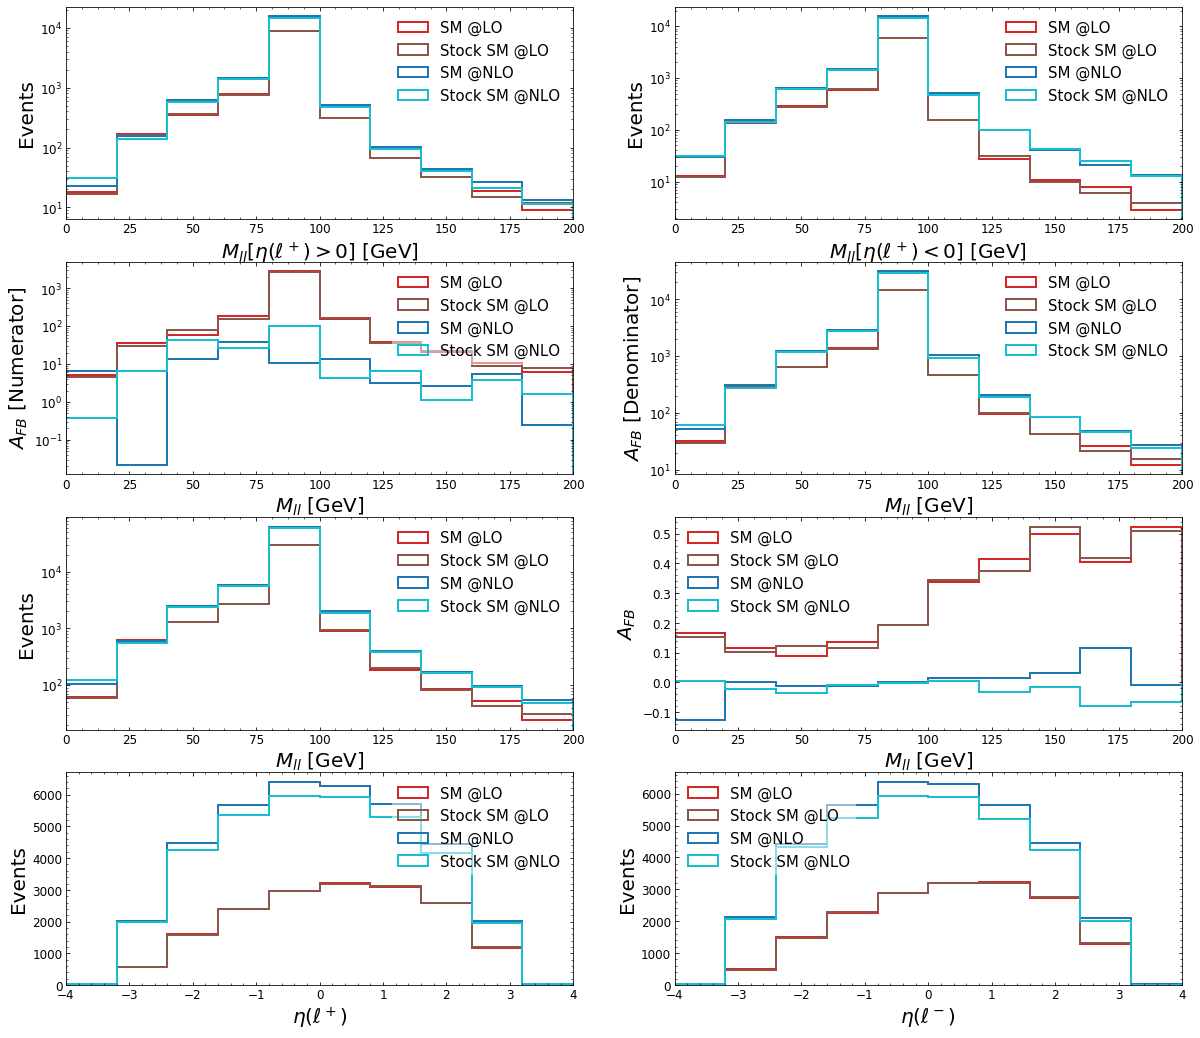

In [225]:
fig = plt.figure(1, figsize=(20, 18), facecolor='w', edgecolor='k')

bins = np.array(sm_histos[sm_histos.name=='AFB_pos_Rap_0'].binMin).tolist()+[max(sm_histos[sm_histos.name=='AFB_neg_Rap_0'].binMax)]
Etabins = np.array(StockSM_NLO_histos[StockSM_NLO_histos.name=='Eta_lp_Rap_0'].binMin).tolist()+[max(StockSM_NLO_histos[StockSM_NLO_histos.name=='Eta_lp_Rap_0'].binMax)]

pos_eta = plt.hist(sm_histos[sm_histos.name=='AFB_pos_Rap_0'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(sm_histos[sm_histos.name=='AFB_pos_Rap_0'].value,dtype=float)*sm.xsec/sm_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

StockSM_pos_eta = plt.hist(StockSM_histos[StockSM_histos.name=='AFB_pos_Rap_0'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(StockSM_histos[StockSM_histos.name=='AFB_pos_Rap_0'].value,dtype=float)*StockSM.xsec/StockSM_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_NLO_pos_eta = plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_0'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_0'].value,dtype=float)*SM_NLO.xsec/SM_NLO_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

StockSM_NLO_pos_eta = plt.hist(StockSM_NLO_histos[StockSM_NLO_histos.name=='AFB_pos_Rap_0'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(StockSM_NLO_histos[StockSM_NLO_histos.name=='AFB_pos_Rap_0'].value,dtype=float)*StockSM_NLO.xsec/StockSM_NLO_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")



neg_eta = plt.hist(sm_histos[sm_histos.name=='AFB_neg_Rap_0'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(sm_histos[sm_histos.name=='AFB_neg_Rap_0'].value,dtype=float)*sm.xsec/sm_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

StockSM_neg_eta = plt.hist(StockSM_histos[StockSM_histos.name=='AFB_neg_Rap_0'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(StockSM_histos[StockSM_histos.name=='AFB_neg_Rap_0'].value,dtype=float)*StockSM.xsec/StockSM_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_NLO_neg_eta = plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_0'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_0'].value,dtype=float)*SM_NLO.xsec/SM_NLO_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

StockSM_NLO_neg_eta = plt.hist(StockSM_NLO_histos[StockSM_NLO_histos.name=='AFB_neg_Rap_0'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(StockSM_NLO_histos[StockSM_NLO_histos.name=='AFB_neg_Rap_0'].value,dtype=float)*StockSM_NLO.xsec/StockSM_NLO_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_Mll = plt.hist(sm_histos[sm_histos.name=='Mll_Rap_0'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(sm_histos[sm_histos.name=='Mll_Rap_0'].value,dtype=float)*sm.xsec/sm_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

StockSM_Mll = plt.hist(StockSM_histos[StockSM_histos.name=='Mll_Rap_0'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(StockSM_histos[StockSM_histos.name=='Mll_Rap_0'].value,dtype=float)*StockSM.xsec/StockSM_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")


SM_NLO_Mll = plt.hist(SM_NLO_histos[SM_NLO_histos.name=='Mll_Rap_0'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_NLO_histos[SM_NLO_histos.name=='Mll_Rap_0'].value,dtype=float)*SM_NLO.xsec/SM_NLO_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")


StockSM_NLO_Mll = plt.hist(StockSM_NLO_histos[StockSM_NLO_histos.name=='Mll_Rap_0'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(StockSM_NLO_histos[StockSM_NLO_histos.name=='Mll_Rap_0'].value,dtype=float)*StockSM_NLO.xsec/StockSM_NLO_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_Eta_lp = plt.hist(sm_histos[sm_histos.name=='Eta_lp_Rap_0'].binlabel,bins=Etabins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(sm_histos[sm_histos.name=='Eta_lp_Rap_0'].value,dtype=float)*sm.xsec/sm_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")


StockSM_Eta_lp = plt.hist(StockSM_histos[StockSM_histos.name=='Eta_lp_Rap_0'].binlabel,bins=Etabins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(StockSM_histos[StockSM_histos.name=='Eta_lp_Rap_0'].value,dtype=float)*StockSM.xsec/StockSM_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_NLO_Eta_lp = plt.hist(SM_NLO_histos[SM_NLO_histos.name=='Eta_lp_Rap_0'].binlabel,bins=Etabins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_NLO_histos[SM_NLO_histos.name=='Eta_lp_Rap_0'].value,dtype=float)*SM_NLO.xsec/SM_NLO_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

StockSM_NLO_Eta_lp = plt.hist(StockSM_NLO_histos[StockSM_NLO_histos.name=='Eta_lp_Rap_0'].binlabel,bins=Etabins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(StockSM_NLO_histos[StockSM_NLO_histos.name=='Eta_lp_Rap_0'].value,dtype=float)*StockSM_NLO.xsec/StockSM_NLO_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_Eta_lm = plt.hist(sm_histos[sm_histos.name=='Eta_lm_Rap_0'].binlabel,bins=Etabins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(sm_histos[sm_histos.name=='Eta_lm_Rap_0'].value,dtype=float)*sm.xsec/sm_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")


StockSM_Eta_lm = plt.hist(StockSM_histos[StockSM_histos.name=='Eta_lm_Rap_0'].binlabel,bins=Etabins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(StockSM_histos[StockSM_histos.name=='Eta_lm_Rap_0'].value,dtype=float)*StockSM.xsec/StockSM_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_NLO_Eta_lm = plt.hist(SM_NLO_histos[SM_NLO_histos.name=='Eta_lm_Rap_0'].binlabel,bins=Etabins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_NLO_histos[SM_NLO_histos.name=='Eta_lm_Rap_0'].value,dtype=float)*SM_NLO.xsec/SM_NLO_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

StockSM_NLO_Eta_lm = plt.hist(StockSM_NLO_histos[StockSM_NLO_histos.name=='Eta_lm_Rap_0'].binlabel,bins=Etabins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(StockSM_NLO_histos[StockSM_NLO_histos.name=='Eta_lm_Rap_0'].value,dtype=float)*StockSM_NLO.xsec/StockSM_NLO_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")



AFBm = pos_eta[0] - neg_eta[0]
AFBp = pos_eta[0] + neg_eta[0]

StockSM_AFBm = StockSM_pos_eta[0] - StockSM_neg_eta[0]
StockSM_AFBp = StockSM_pos_eta[0] + StockSM_neg_eta[0]

SM_NLO_AFBm = SM_NLO_pos_eta[0] - SM_NLO_neg_eta[0]
SM_NLO_AFBp = SM_NLO_pos_eta[0] + SM_NLO_neg_eta[0]

StockSM_NLO_AFBm = StockSM_NLO_pos_eta[0] - StockSM_NLO_neg_eta[0]
StockSM_NLO_AFBp = StockSM_NLO_pos_eta[0] + StockSM_NLO_neg_eta[0]


ax1 = plt.subplot(4, 2, 1)
plt.hist(sm_histos[sm_histos.name=='AFB_pos_Rap_0'].binlabel,bins=bins,
             label=r'SM @LO', histtype="step", rwidth=1.0,
             weights=pos_eta[0],
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(StockSM_histos[StockSM_histos.name=='AFB_pos_Rap_0'].binlabel,bins=bins,
             label=r'Stock SM @LO', histtype="step", rwidth=1.0,
             weights=StockSM_pos_eta[0],
             color=None, edgecolor='tab:brown', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_0'].binlabel,bins=bins,
             label=r'SM @NLO', histtype="step", rwidth=1.0,
             weights=SM_NLO_pos_eta[0],
             color=None, edgecolor='tab:blue', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(StockSM_NLO_histos[StockSM_NLO_histos.name=='AFB_pos_Rap_0'].binlabel,bins=bins,
             label=r'Stock SM @NLO', histtype="step", rwidth=1.0,
             weights=StockSM_NLO_pos_eta[0],
             color=None, edgecolor='tab:cyan', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.xlabel('$M_{ll} [\eta(\ell^+)>0] $ [GeV]' , fontsize=20)
plt.ylabel('Events' , fontsize=20)
plt.yscale('log')

ax2 = plt.subplot(4, 2, 2)
plt.hist(sm_histos[sm_histos.name=='AFB_neg_Rap_0'].binlabel,bins=bins,
             label=r'SM @LO', histtype="step", rwidth=1.0,
             weights=neg_eta[0],
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(StockSM_histos[StockSM_histos.name=='AFB_neg_Rap_0'].binlabel,bins=bins,
             label=r'Stock SM @LO', histtype="step", rwidth=1.0,
             weights=StockSM_neg_eta[0],
             color=None, edgecolor='tab:brown', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_0'].binlabel,bins=bins,
             label=r'SM @NLO', histtype="step", rwidth=1.0,
             weights=SM_NLO_neg_eta[0],
             color=None, edgecolor='tab:blue', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(StockSM_NLO_histos[StockSM_NLO_histos.name=='AFB_neg_Rap_0'].binlabel,bins=bins,
             label=r'Stock SM @NLO', histtype="step", rwidth=1.0,
             weights=StockSM_NLO_neg_eta[0],
             color=None, edgecolor='tab:cyan', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.xlabel('$M_{ll} [\eta(\ell^+)<0] $ [GeV]' , fontsize=20)
plt.ylabel('Events' , fontsize=20)
plt.yscale('log')


ax3 = plt.subplot(4, 2, 3)
plt.hist(sm_histos[sm_histos.name=='AFB_neg_Rap_0'].binlabel,bins=bins,
             label=r'SM @LO', histtype="step", rwidth=1.0,
             weights=abs(AFBm),
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(StockSM_histos[StockSM_histos.name=='AFB_neg_Rap_0'].binlabel,bins=bins,
             label=r'Stock SM @LO', histtype="step", rwidth=1.0,
             weights=abs(StockSM_AFBm),
             color=None, edgecolor='tab:brown', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_0'].binlabel,bins=bins,
             label=r'SM @NLO', histtype="step", rwidth=1.0,
             weights=abs(SM_NLO_AFBm),
             color=None, edgecolor='tab:blue', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(StockSM_NLO_histos[StockSM_NLO_histos.name=='AFB_neg_Rap_0'].binlabel,bins=bins,
             label=r'Stock SM @NLO', histtype="step", rwidth=1.0,
             weights=abs(StockSM_NLO_AFBm),
             color=None, edgecolor='tab:cyan', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.yscale('log')
plt.xlabel('$M_{ll}$ [GeV]' , fontsize=20)
plt.ylabel('$A_{FB}$ [Numerator]' , fontsize=20)

ax4 = plt.subplot(4, 2, 4)
plt.hist(sm_histos[sm_histos.name=='AFB_pos_Rap_0'].binlabel,bins=bins,
             label='SM @LO', histtype="step", rwidth=1.0,
             weights=AFBp,
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(StockSM_histos[StockSM_histos.name=='AFB_pos_Rap_0'].binlabel,bins=bins,
             label=r'Stock SM @LO', histtype="step", rwidth=1.0,
             weights=StockSM_AFBp,
             color=None, edgecolor='tab:brown', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_pos_Rap_0'].binlabel,bins=bins,
             label=r'SM @NLO', histtype="step", rwidth=1.0,
             weights=SM_NLO_AFBp,
             color=None, edgecolor='tab:blue', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(StockSM_NLO_histos[StockSM_NLO_histos.name=='AFB_pos_Rap_0'].binlabel,bins=bins,
             label=r'Stock SM @NLO', histtype="step", rwidth=1.0,
             weights=StockSM_NLO_AFBp,
             color=None, edgecolor='tab:cyan', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.yscale('log')
plt.xlabel('$M_{ll}$ [GeV]' , fontsize=20)
plt.ylabel('$A_{FB}$ [Denominator]' , fontsize=20)


ax5 = plt.subplot(4, 2, 5)
plt.hist(sm_histos[sm_histos.name=='Mll_Rap_0'].binlabel,bins=bins,
             label=r'SM @LO', histtype="step", rwidth=1.0,
             weights=SM_Mll[0],
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(StockSM_histos[StockSM_histos.name=='Mll_Rap_0'].binlabel,bins=bins,
             label=r'Stock SM @LO', histtype="step", rwidth=1.0,
             weights=StockSM_Mll[0],
             color=None, edgecolor='tab:brown', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SM_NLO_histos[SM_NLO_histos.name=='Mll_Rap_0'].binlabel,bins=bins,
             label=r'SM @NLO', histtype="step", rwidth=1.0,
             weights=SM_NLO_Mll[0],
             color=None, edgecolor='tab:blue', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(StockSM_NLO_histos[StockSM_NLO_histos.name=='Mll_Rap_0'].binlabel,bins=bins,
             label=r'Stock SM @NLO', histtype="step", rwidth=1.0,
             weights=StockSM_NLO_Mll[0],
             color=None, edgecolor='tab:cyan', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.yscale('log')
plt.xlabel('$M_{ll}$ [GeV]' , fontsize=20)
plt.ylabel('Events' , fontsize=20)


ax6 = plt.subplot(4, 2, 6)
plt.hist(sm_histos[sm_histos.name=='AFB_neg_Rap_0'].binlabel,bins=bins,
             label=r'SM @LO', histtype="step", rwidth=1.0,
             weights=AFBm/np.where(AFBp==0,1e-30,AFBp),
             =None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(StockSM_histos[StockSM_histos.name=='AFB_neg_Rap_0'].binlabel,bins=bins,
             label=r'Stock SM @LO', histtype="step", rwidth=1.0,
             weights=StockSM_AFBm/np.where(StockSM_AFBp==0,1e-30,StockSM_AFBp),
             color=None, edgecolor='tab:brown', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SM_NLO_histos[SM_NLO_histos.name=='AFB_neg_Rap_0'].binlabel,bins=bins,
             label=r'SM @NLO', histtype="step", rwidth=1.0,
             weights=SM_NLO_AFBm/np.where(SM_NLO_AFBp==0,1e-30,SM_NLO_AFBp),
             color=None, edgecolor='tab:blue', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(StockSM_NLO_histos[StockSM_NLO_histos.name=='AFB_pos_Rap_0'].binlabel,bins=bins,
             label=r'Stock SM @NLO', histtype="step", rwidth=1.0,
             weights=StockSM_NLO_AFBm/np.where(StockSM_NLO_AFBp==0,1e-30,StockSM_NLO_AFBp),
             color=None, edgecolor='tab:cyan', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.xlabel('$M_{ll}$ [GeV]' , fontsize=20)
plt.ylabel('$A_{FB}$' , fontsize=20)


ax7 = plt.subplot(4, 2, 7)
plt.hist(sm_histos[sm_histos.name=='Eta_lp_Rap_0'].binlabel,bins=Etabins,
             label=r'SM @LO', histtype="step", rwidth=1.0,
             weights=SM_Eta_lp[0],
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(StockSM_histos[StockSM_histos.name=='Eta_lp_Rap_0'].binlabel,bins=Etabins,
             label=r'Stock SM @LO', histtype="step", rwidth=1.0,
             weights=StockSM_Eta_lp[0],
             color=None, edgecolor='tab:brown', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SM_NLO_histos[SM_NLO_histos.name=='Eta_lp_Rap_0'].binlabel,bins=Etabins,
             label=r'SM @NLO', histtype="step", rwidth=1.0,
             weights=SM_NLO_Eta_lp[0],
             color=None, edgecolor='tab:blue', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(StockSM_NLO_histos[StockSM_NLO_histos.name=='Eta_lp_Rap_0'].binlabel,bins=Etabins,
             label=r'Stock SM @NLO', histtype="step", rwidth=1.0,
             weights=StockSM_NLO_Eta_lp[0],
             color=None, edgecolor='tab:cyan', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.yscale('log')
plt.xlabel('$\eta(\ell^+)$' , fontsize=20)
plt.ylabel('Events' , fontsize=20)


ax8 = plt.subplot(4, 2, 8)
plt.hist(sm_histos[sm_histos.name=='Eta_lm_Rap_0'].binlabel,bins=Etabins,
             label=r'SM @LO', histtype="step", rwidth=1.0,
             weights=SM_Eta_lm[0],
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(StockSM_histos[StockSM_histos.name=='Eta_lm_Rap_0'].binlabel,bins=Etabins,
             label=r'Stock SM @LO', histtype="step", rwidth=1.0,
             weights=StockSM_Eta_lm[0],
             color=None, edgecolor='tab:brown', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(SM_NLO_histos[SM_NLO_histos.name=='Eta_lm_Rap_0'].binlabel,bins=Etabins,
             label=r'SM @NLO', histtype="step", rwidth=1.0,
             weights=SM_NLO_Eta_lm[0],
             color=None, edgecolor='tab:blue', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
plt.hist(StockSM_NLO_histos[StockSM_NLO_histos.name=='Eta_lm_Rap_0'].binlabel,bins=Etabins,
             label=r'Stock SM @NLO', histtype="step", rwidth=1.0,
             weights=StockSM_NLO_Eta_lm[0],
             color=None, edgecolor='tab:cyan', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")
#plt.yscale('log')
plt.xlabel('$\eta(\ell^-)$' , fontsize=20)
plt.ylabel('Events' , fontsize=20)

leg = ax1.legend(loc='upper right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax1.set_xlim([min(bins),max(bins)])

leg = ax2.legend(loc='upper right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax2.set_xlim([min(bins),max(bins)])

leg = ax3.legend(loc='upper right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax3.set_xlim([min(bins),max(bins)])

leg = ax4.legend(loc='upper right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax4.set_xlim([min(bins),max(bins)])

leg = ax5.legend(loc='upper right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax5.set_xlim([min(bins),max(bins)])

leg = ax6.legend(loc='upper left',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax6.set_xlim([min(bins),max(bins)])

leg = ax7.legend(loc='upper right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax7.set_xlim([min(Etabins),max(Etabins)])

leg = ax8.legend(loc='upper left',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax8.set_xlim([min(Etabins),max(Etabins)])

plt.show()

NameError: name 'ax' is not defined

<Figure size 1000x800 with 0 Axes>

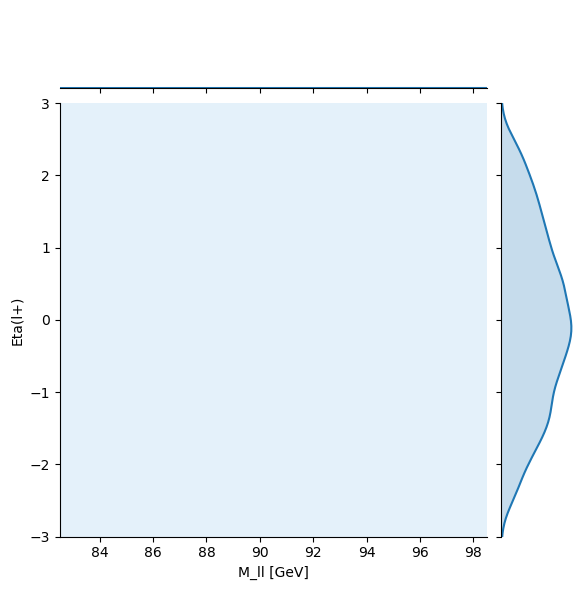

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(10, 8)) #facecolor='w', edgecolor='k'
df = pd.read_csv('/home/phylab/hepwork/madanalysis5/SSM_Zptoll/Build/SM_LO.csv')
plot = sns.jointplot(x=df["Mll"],y=df["Eta_lp"], kind="kde")
plot.ax_marg_x.set_xlim(82.5, 98.5)
plot.ax_marg_y.set_ylim(-3.0, 3.0)
plot.ax_joint.set_xlabel('M_ll [GeV]')
plot.ax_joint.set_ylabel('Eta(l+)')
plot.ax_joint.legend_.remove()
leg = ax.legend(loc='upper right',fontsize=15)
plt.title(r"SM LO")
plt.show()

NameError: name 'ax' is not defined

<Figure size 1000x800 with 0 Axes>

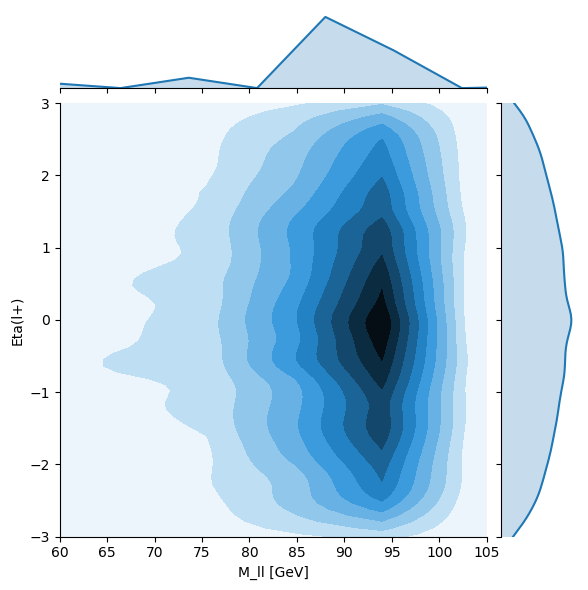

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(10, 8)) #facecolor='w', edgecolor='k'
df = pd.read_csv('/home/phylab/hepwork/madanalysis5/SSM_Zptoll/Build/SM_NLO.csv')
plot = sns.jointplot(x=df["Mll"],y=df["Eta_lp"], kind="kde")
plot.ax_marg_x.set_xlim(60.0, 105.0)
plot.ax_marg_y.set_ylim(-3.0, 3.0)
plot.ax_joint.set_xlabel('M_ll [GeV]')
plot.ax_joint.set_ylabel('Eta(l+)')
plot.ax_joint.legend_.remove()
leg = ax.legend(loc='upper right',fontsize=15)
plt.title(r"SM NLO")
plt.show()

<Figure size 720x576 with 0 Axes>

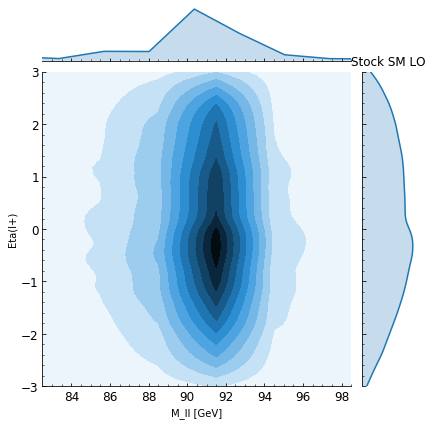

In [245]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(10, 8), facecolor='w', edgecolor='k')
df = pd.read_csv('/home/phylab/hepwork/madanalysis5/SSM_Zptoll/Build/StockSM_LO.csv')
plot = sns.jointplot(x=df["Mll"],y=df["Eta_lp"], kind="kde")
plot.ax_marg_x.set_xlim(82.5, 98.5)
plot.ax_marg_y.set_ylim(-3.0, 3.0)
plot.ax_joint.set_xlabel('M_ll [GeV]')
plot.ax_joint.set_ylabel('Eta(l+)')
plot.ax_joint.legend_.remove()
leg = ax.legend(loc='upper right',fontsize=15)
plt.title(r"Stock SM LO")
plt.show()

<Figure size 720x576 with 0 Axes>

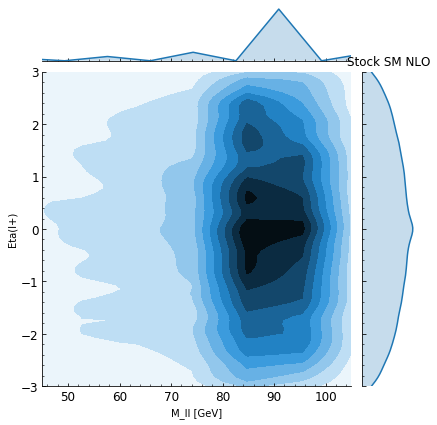

In [248]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(10, 8), facecolor='w', edgecolor='k')
df = pd.read_csv('/home/phylab/hepwork/madanalysis5/SSM_Zptoll/Build/StockSM_NLO.csv')
plot = sns.jointplot(x=df["Mll"],y=df["Eta_lp"], kind="kde")
plot.ax_marg_x.set_xlim(45.0, 105.0)
plot.ax_marg_y.set_ylim(-3.0, 3.0)
plot.ax_joint.set_xlabel('M_ll [GeV]')
plot.ax_joint.set_ylabel('Eta(l+)')
plot.ax_joint.legend_.remove()
leg = ax.legend(loc='upper right',fontsize=15)
plt.title(r"Stock SM NLO")
plt.show()

Text(0.5,1,'Stock SM NLO')

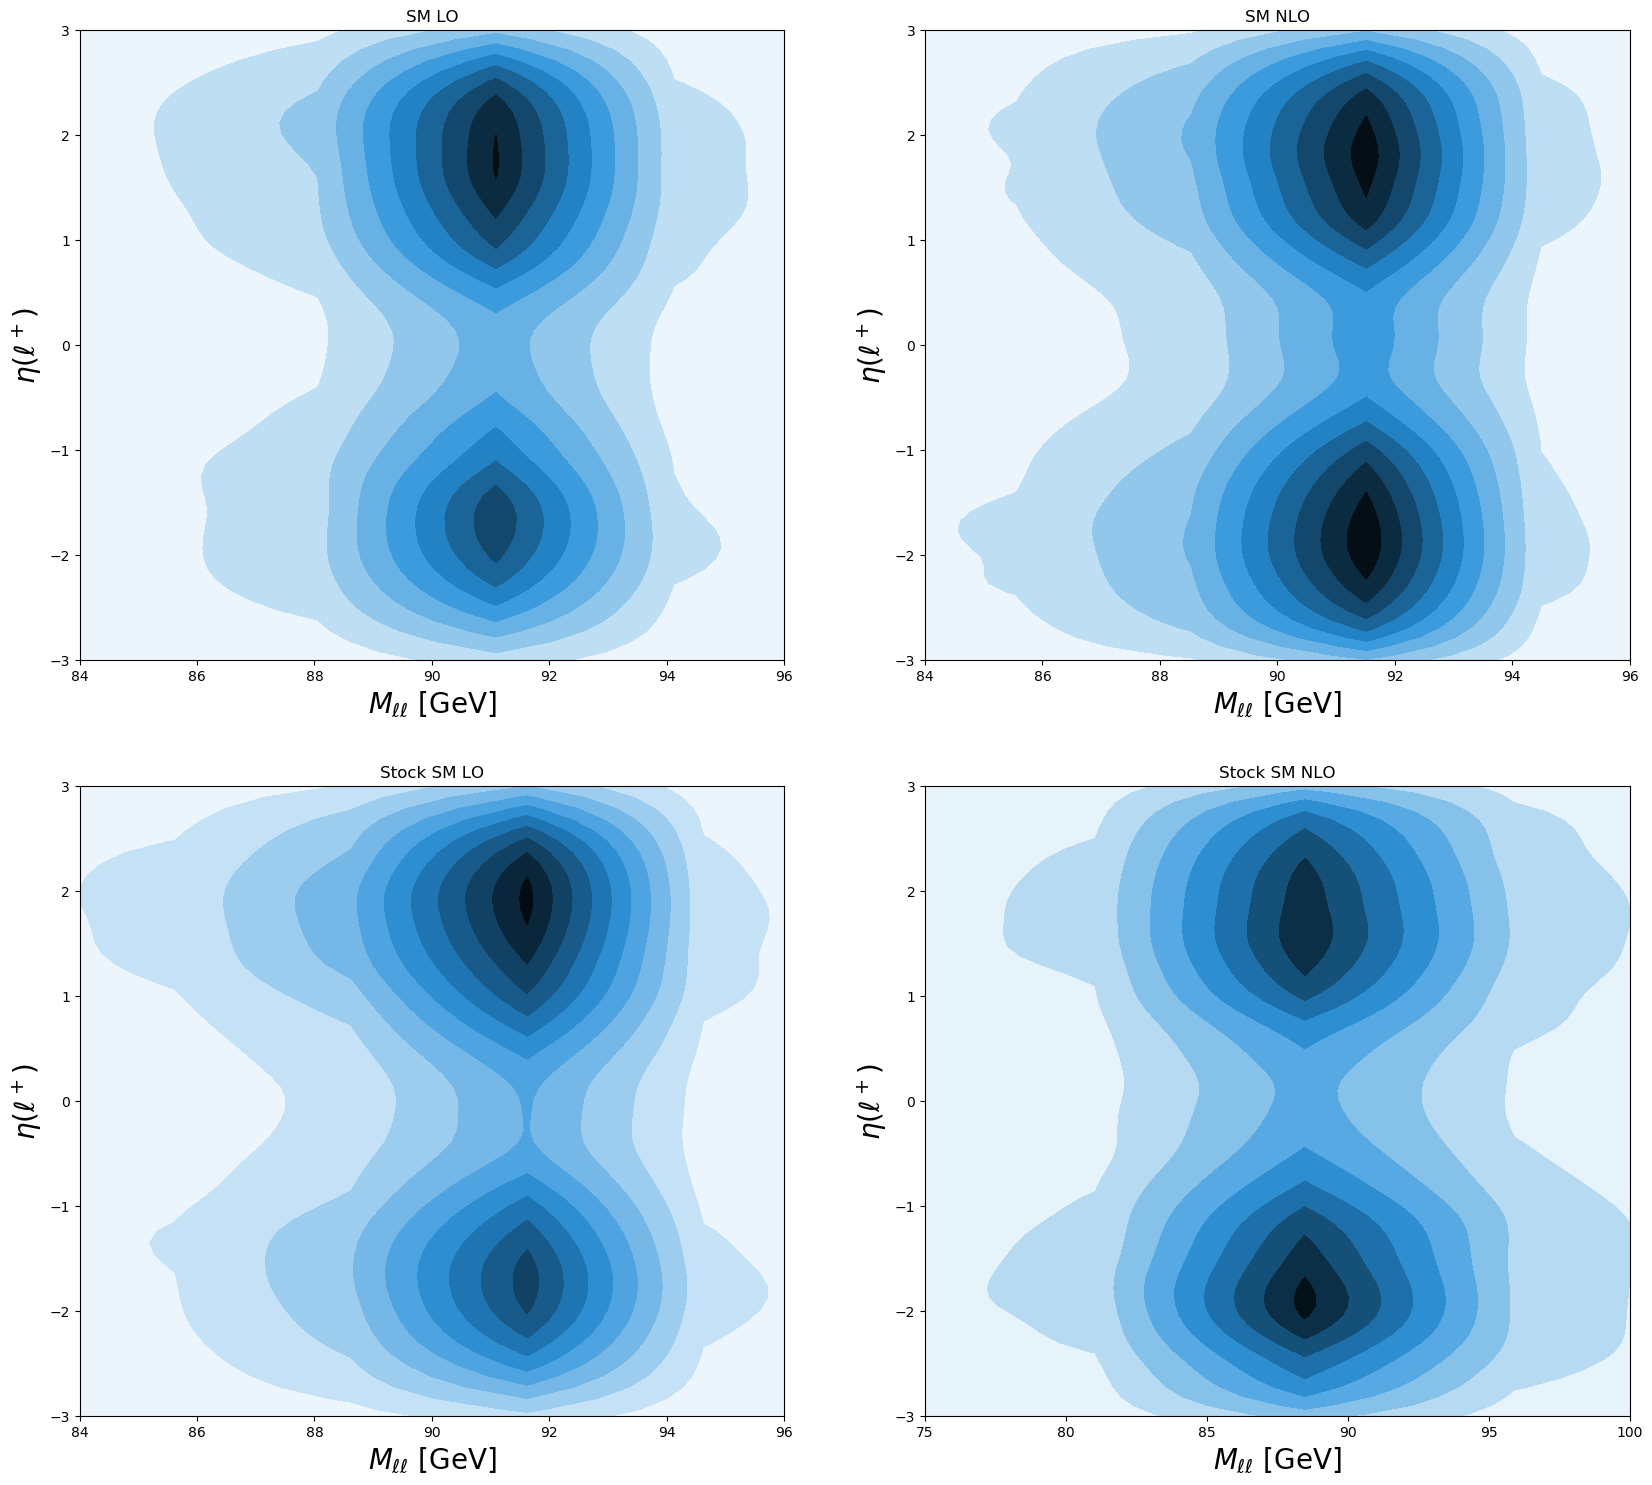

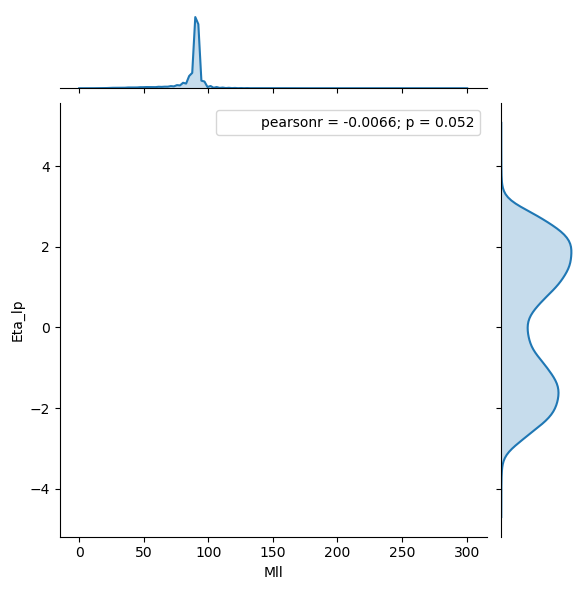

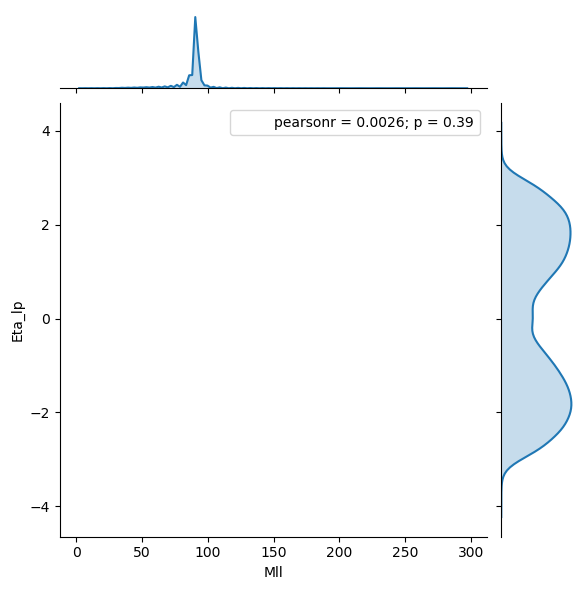

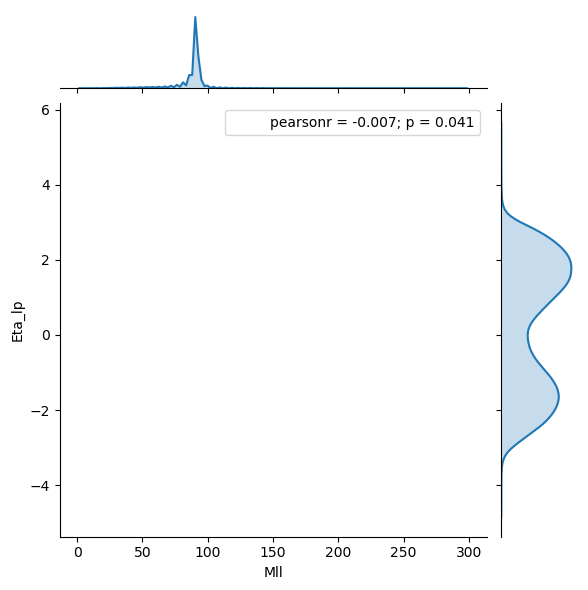

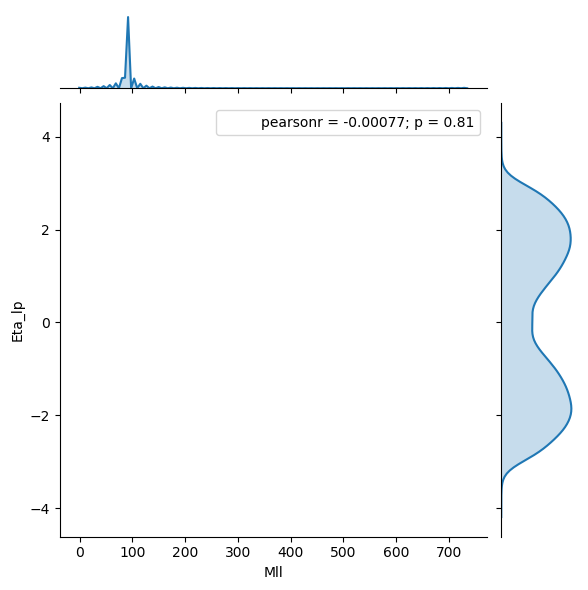

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 18))

SM_LO = pd.read_csv('/home/phylab/hepwork/madanalysis5/SSM_Zptoll/Build/SM_LO.csv')
sns.jointplot(x=SM_LO["Mll"],y=SM_LO["Eta_lp"], kind="kde", ax=ax1)

SM_NLO = pd.read_csv('/home/phylab/hepwork/madanalysis5/SSM_Zptoll/Build/SM_NLO_2.csv')
sns.jointplot(x=SM_NLO["Mll"],y=SM_NLO["Eta_lp"], kind="kde", ax=ax2)

StockSM_LO = pd.read_csv('/home/phylab/hepwork/madanalysis5/SSM_Zptoll/Build/StockSM_LO_2.csv')
sns.jointplot(x=StockSM_LO["Mll"],y=StockSM_LO["Eta_lp"], kind="kde", ax=ax3)

StockSM_NLO = pd.read_csv('/home/phylab/hepwork/madanalysis5/SSM_Zptoll/Build/StockSM_NLO_2.csv')
sns.jointplot(x=StockSM_NLO["Mll"],y=StockSM_NLO["Eta_lp"], kind="kde", ax=ax4)

ax1.set_xlim(84, 96)
ax1.set_ylim(-3.0, 3.0)
ax1.set_xlabel('$M_{\ell \ell}$ [GeV]' , fontsize=20)
ax1.set_ylabel('$\eta(\ell^+)$' , fontsize=20)
ax1.set_title("SM LO")

ax2.set_xlim(84, 96)
ax2.set_ylim(-3.0, 3.0)
ax2.set_xlabel('$M_{\ell \ell}$ [GeV]' , fontsize=20)
ax2.set_ylabel('$\eta(\ell^+)$' , fontsize=20)
ax2.set_title("SM NLO")

ax3.set_xlim(84, 96)
ax3.set_ylim(-3.0, 3.0)
ax3.set_xlabel('$M_{\ell \ell}$ [GeV]' , fontsize=20)
ax3.set_ylabel('$\eta(\ell^+)$' , fontsize=20)
ax3.set_title("Stock SM LO")

ax4.set_xlim(75.0, 100.0)
ax4.set_ylim(-3.0, 3.0)
ax4.set_xlabel('$M_{\ell \ell}$ [GeV]' , fontsize=20)
ax4.set_ylabel('$\eta(\ell^+)$' , fontsize=20)
ax4.set_title("Stock SM NLO")

Text(0.5,1,'Stock SM NLO')

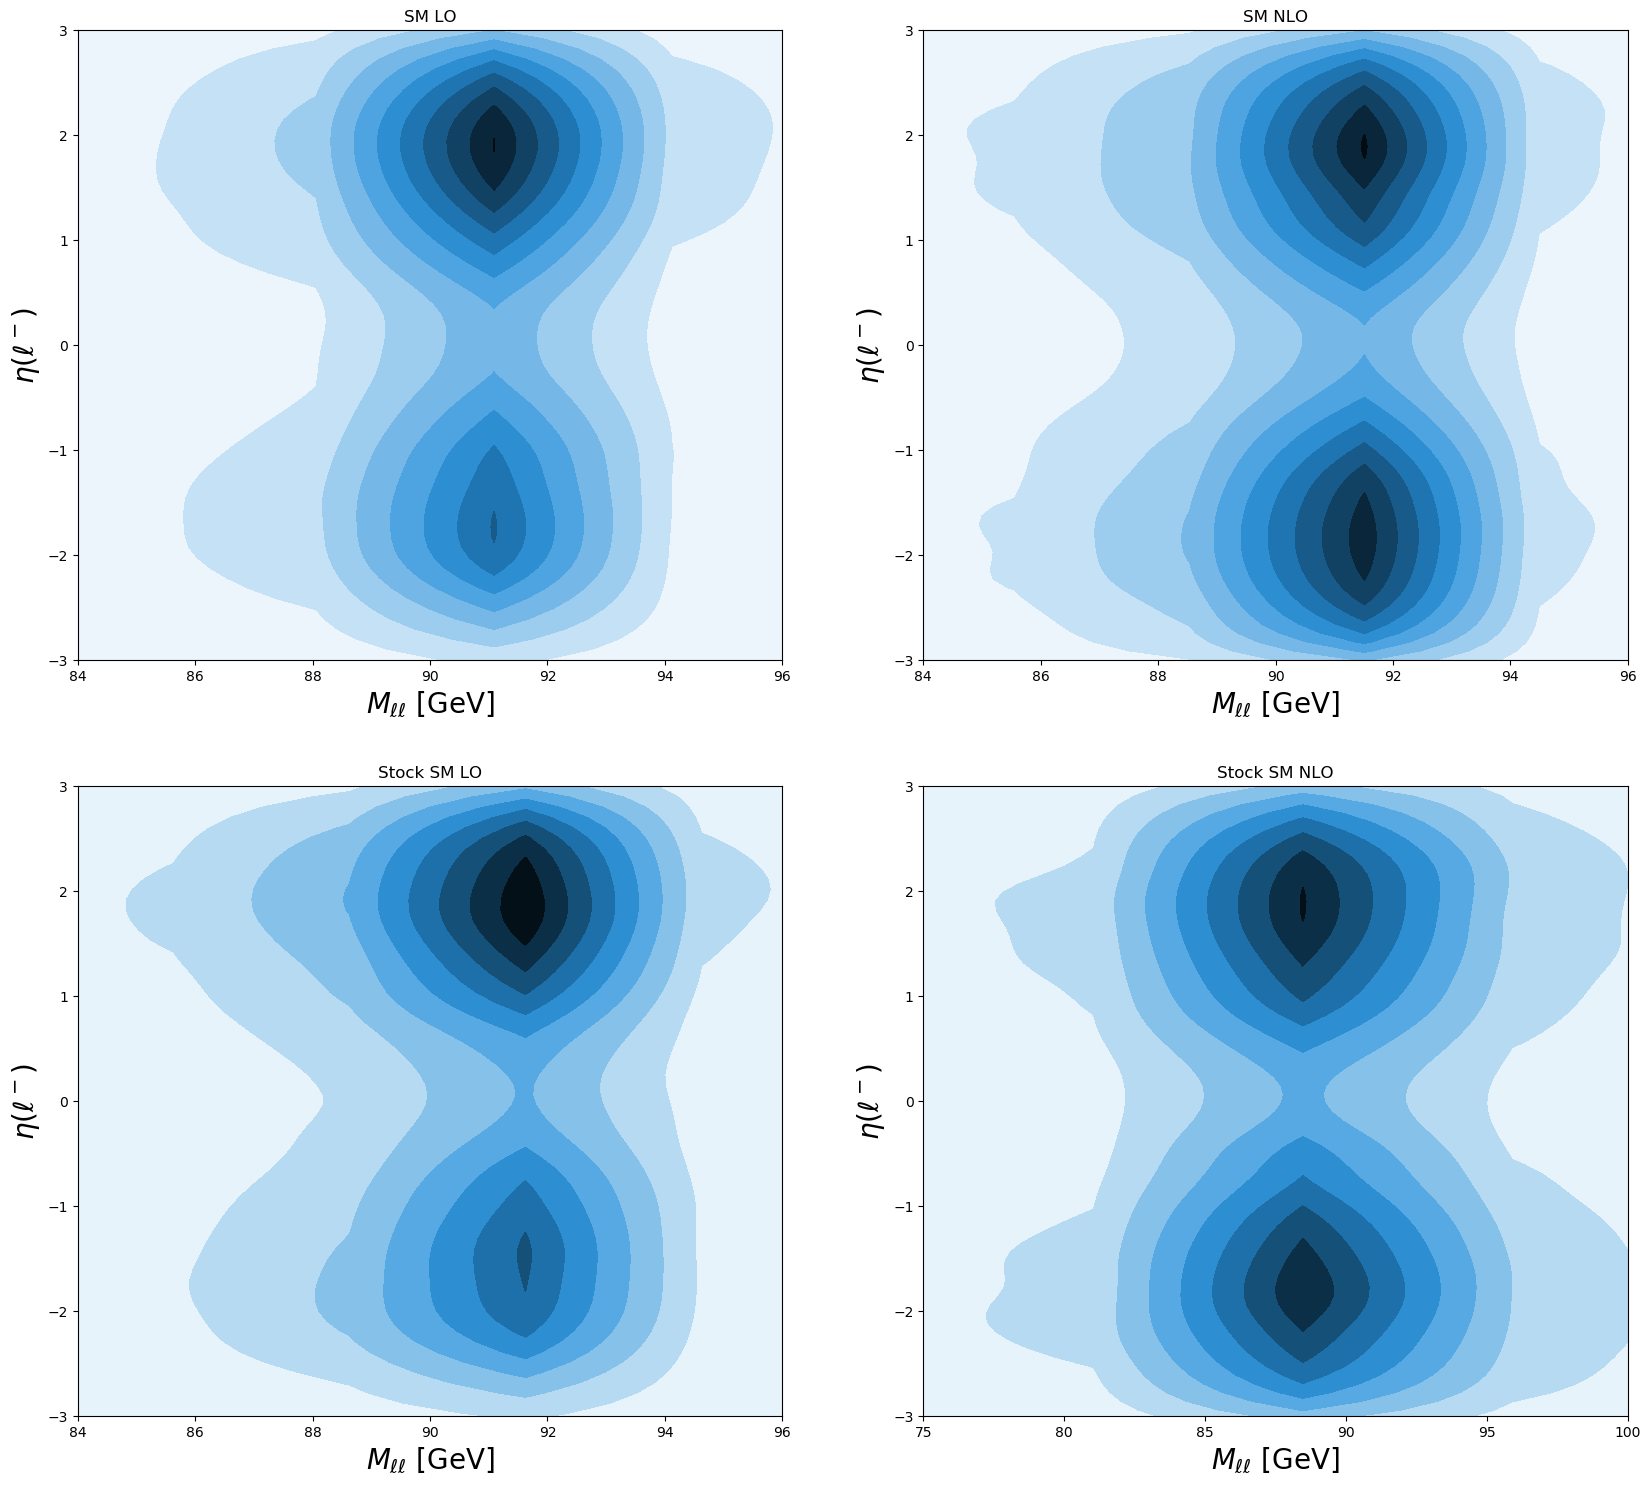

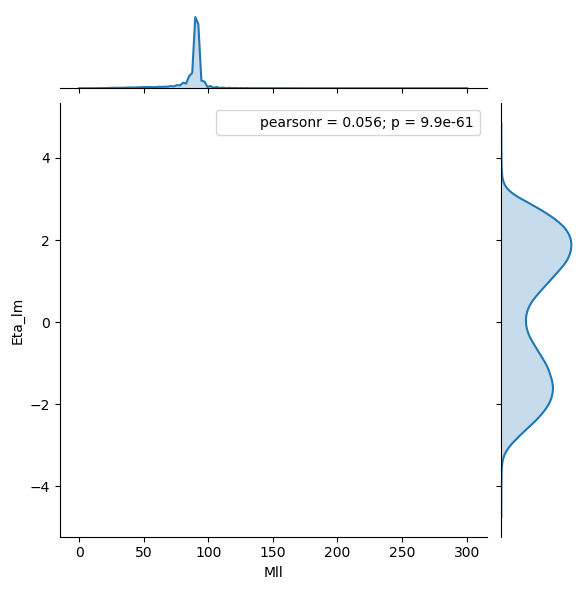

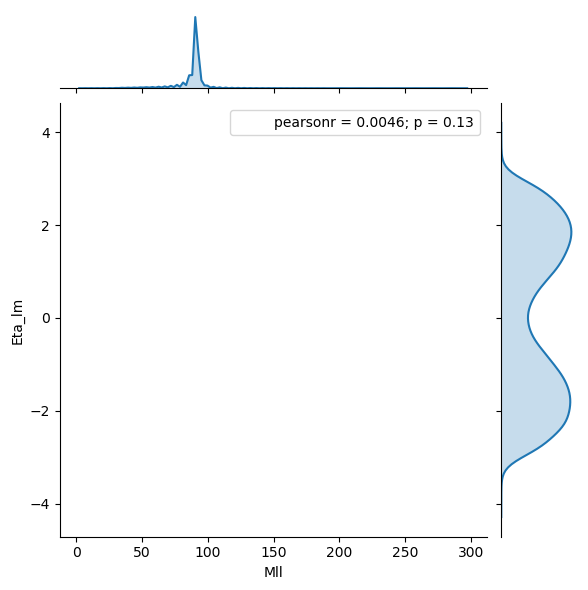

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 18))

SM_LO = pd.read_csv('/home/phylab/hepwork/madanalysis5/SSM_Zptoll/Build/SM_LO.csv')
sns.jointplot(x=SM_LO["Mll"],y=SM_LO["Eta_lm"], kind="kde", ax=ax1)

SM_NLO = pd.read_csv('/home/phylab/hepwork/madanalysis5/SSM_Zptoll/Build/SM_NLO_2.csv')
sns.jointplot(x=SM_NLO["Mll"],y=SM_NLO["Eta_lm"], kind="kde", ax=ax2)

StockSM_LO = pd.read_csv('/home/phylab/hepwork/madanalysis5/SSM_Zptoll/Build/StockSM_LO_2.csv')
sns.jointplot(x=StockSM_LO["Mll"],y=StockSM_LO["Eta_lm"], kind="kde", ax=ax3)

StockSM_NLO = pd.read_csv('/home/phylab/hepwork/madanalysis5/SSM_Zptoll/Build/StockSM_NLO_2.csv')
sns.jointplot(x=StockSM_NLO["Mll"],y=StockSM_NLO["Eta_lm"], kind="kde", ax=ax4)

ax1.set_xlim(84, 96)
ax1.set_ylim(-3.0, 3.0)
ax1.set_xlabel('$M_{\ell \ell}$ [GeV]' , fontsize=20)
ax1.set_ylabel('$\eta(\ell^-)$' , fontsize=20)
ax1.set_title("SM LO")

ax2.set_xlim(84, 96)
ax2.set_ylim(-3.0, 3.0)
ax2.set_xlabel('$M_{\ell \ell}$ [GeV]' , fontsize=20)
ax2.set_ylabel('$\eta(\ell^-)$' , fontsize=20)
ax2.set_title("SM NLO")

ax3.set_xlim(84, 96)
ax3.set_ylim(-3.0, 3.0)
ax3.set_xlabel('$M_{\ell \ell}$ [GeV]' , fontsize=20)
ax3.set_ylabel('$\eta(\ell^-)$' , fontsize=20)
ax3.set_title("Stock SM LO")

ax4.set_xlim(75.0, 100.0)
ax4.set_ylim(-3.0, 3.0)
ax4.set_xlabel('$M_{\ell \ell}$ [GeV]' , fontsize=20)
ax4.set_ylabel('$\eta(\ell^-)$' , fontsize=20)
ax4.set_title("Stock SM NLO")

Text(0.5,1,'Stock SM NLO')

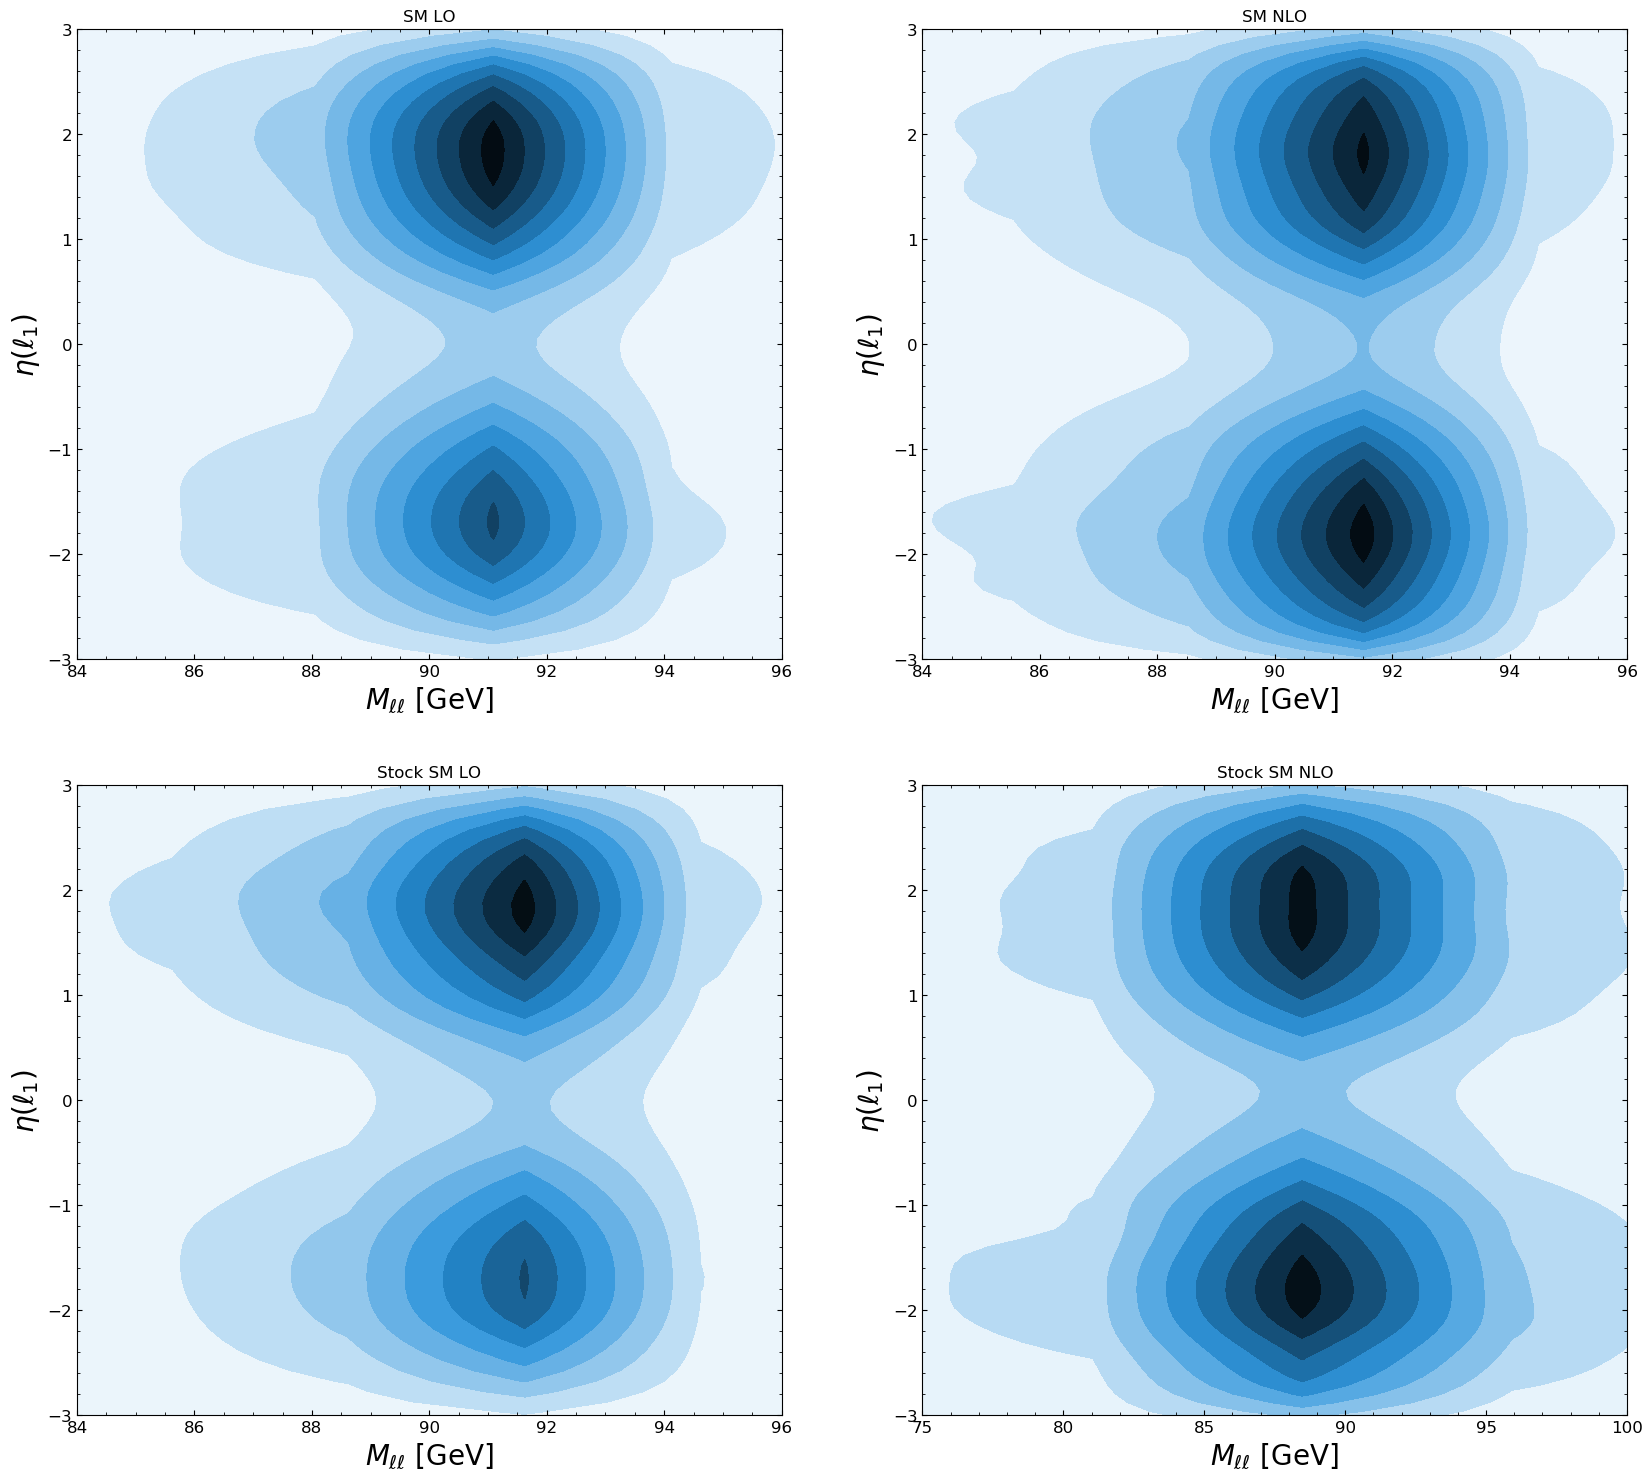

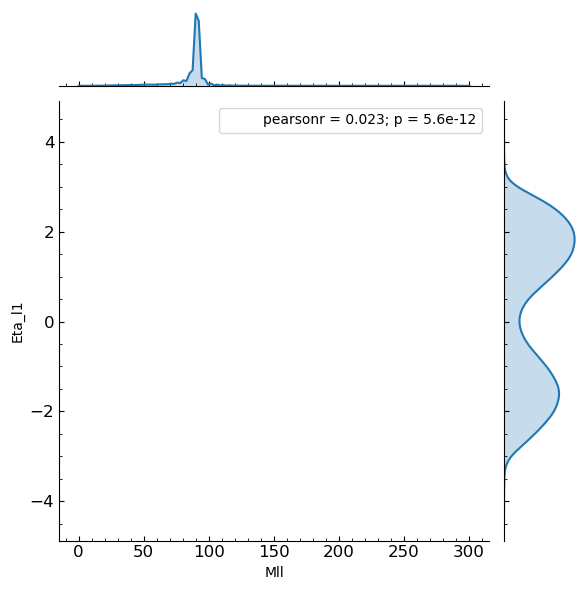

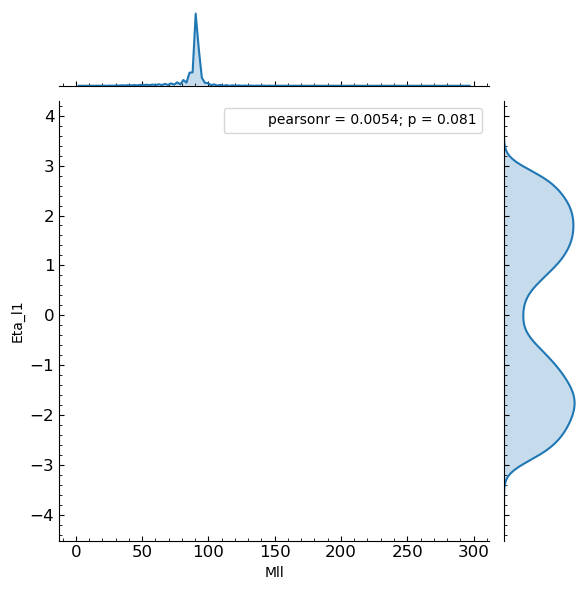

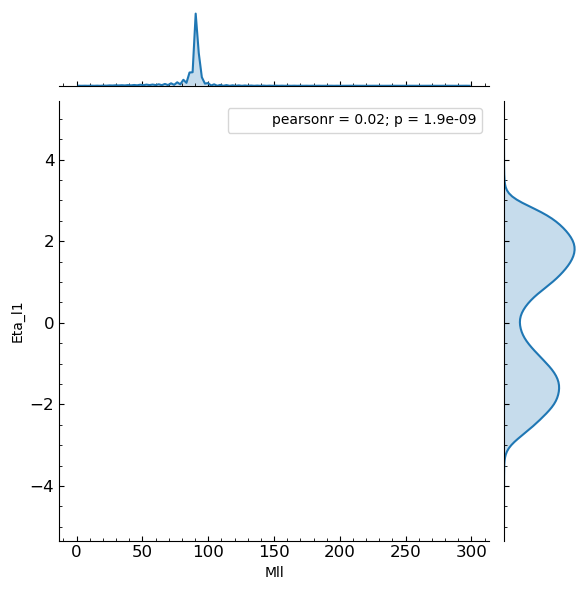

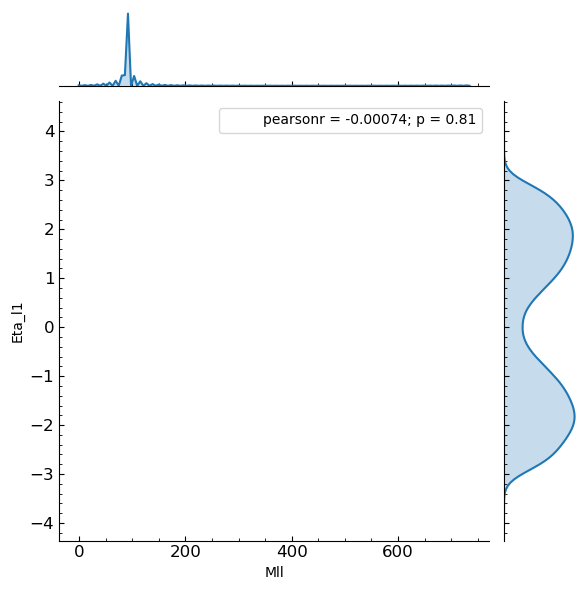

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 18))

SM_LO = pd.read_csv('/home/phylab/hepwork/madanalysis5/SSM_Zptoll/Build/SM_LO_4.csv')
sns.jointplot(x=SM_LO["Mll"],y=SM_LO["Eta_l1"], kind="kde", ax=ax1)

SM_NLO = pd.read_csv('/home/phylab/hepwork/madanalysis5/SSM_Zptoll/Build/SM_NLO_4.csv')
sns.jointplot(x=SM_NLO["Mll"],y=SM_NLO["Eta_l1"], kind="kde", ax=ax2)

StockSM_LO = pd.read_csv('/home/phylab/hepwork/madanalysis5/SSM_Zptoll/Build/StockSM_LO_4.csv')
sns.jointplot(x=StockSM_LO["Mll"],y=StockSM_LO["Eta_l1"], kind="kde", ax=ax3)

StockSM_NLO = pd.read_csv('/home/phylab/hepwork/madanalysis5/SSM_Zptoll/Build/StockSM_NLO_4.csv')
sns.jointplot(x=StockSM_NLO["Mll"],y=StockSM_NLO["Eta_l1"], kind="kde", ax=ax4)

ax1.set_xlim(84, 96)
ax1.set_ylim(-3.0, 3.0)
ax1.set_xlabel('$M_{\ell \ell}$ [GeV]' , fontsize=20)
ax1.set_ylabel('$\eta(\ell_1)$' , fontsize=20)
ax1.set_title("SM LO")

ax2.set_xlim(84, 96)
ax2.set_ylim(-3.0, 3.0)
ax2.set_xlabel('$M_{\ell \ell}$ [GeV]' , fontsize=20)
ax2.set_ylabel('$\eta(\ell_1)$' , fontsize=20)
ax2.set_title("SM NLO")

ax3.set_xlim(84, 96)
ax3.set_ylim(-3.0, 3.0)
ax3.set_xlabel('$M_{\ell \ell}$ [GeV]' , fontsize=20)
ax3.set_ylabel('$\eta(\ell_1)$' , fontsize=20)
ax3.set_title("Stock SM LO")

ax4.set_xlim(75.0, 100.0)
ax4.set_ylim(-3.0, 3.0)
ax4.set_xlabel('$M_{\ell \ell}$ [GeV]' , fontsize=20)
ax4.set_ylabel('$\eta(\ell_1)$' , fontsize=20)
ax4.set_title("Stock SM NLO")